In [2]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [3]:
df = pd.read_csv("C:/Users/Viraj/Documents/crime_data_2.csv")
df.head()

,Unnamed: 0,State,UrbanPop,Murder,Assault,Rape,Total
0,0,Alabama,58.0,13.2,236.0,21.2,270.4
1,1,Alaska,48.0,10.0,263.0,44.5,317.5
2,2,Arizona,80.0,8.1,294.0,31.0,333.1
3,3,Arkansas,50.0,8.8,190.0,19.5,218.3
4,4,California,91.0,9.0,276.0,40.6,325.6


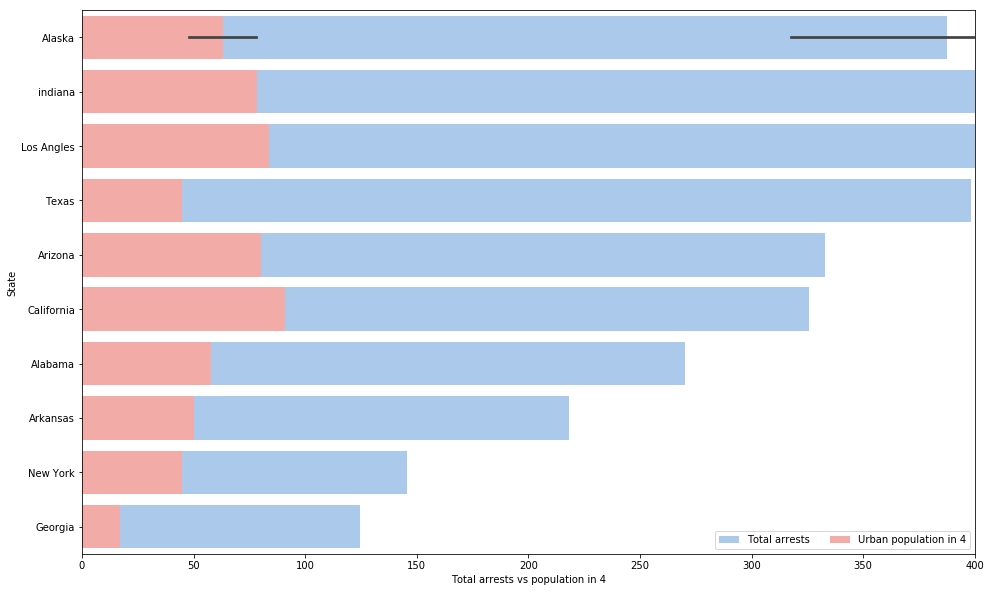

In [4]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="State", data=stats,
            label="Total arrests", color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="State", data=stats,
            label="Urban population in 4", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 4");

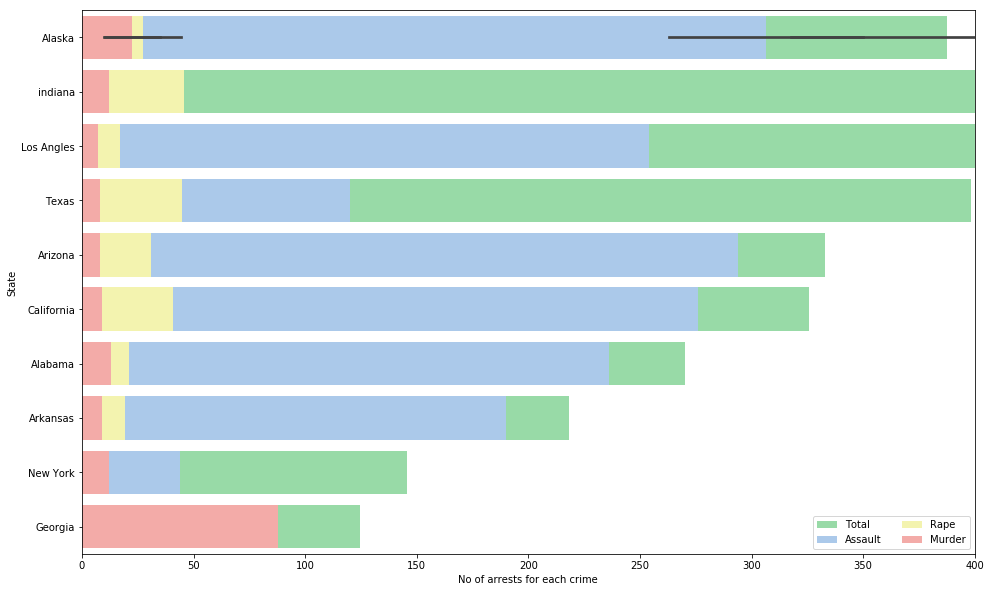

In [7]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="No of arrests for each crime");

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

In [14]:
cluster_errors = []
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )
clusters_df=pd.DataFrame({"num_cluster": cluster_range,"cluster_errors": cluster_errors })


In [15]:
clusters_df[0:5]

,num_cluster,cluster_errors
0,1,44.000000
1,2,20.993688
2,3,12.300723
3,4,8.944545
4,5,5.749051


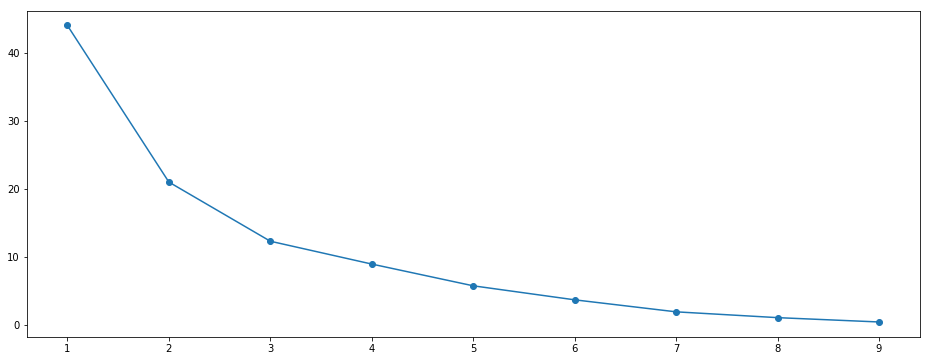

In [16]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_cluster, clusters_df.cluster_errors, marker = "o" );

In [17]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236.0,21.2,58.0
1,10.0,263.0,44.5,48.0
2,8.1,294.0,31.0,80.0
3,8.8,190.0,19.5,50.0
4,9.0,276.0,40.6,91.0


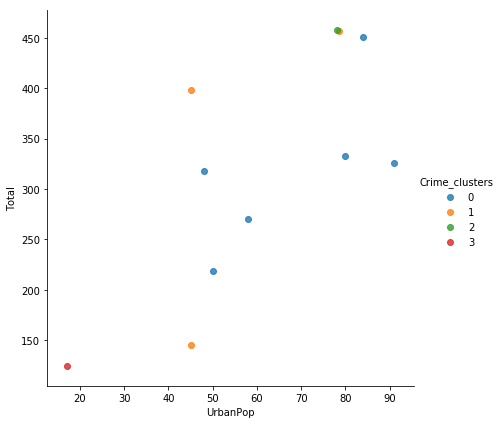

In [18]:
sns.lmplot('UrbanPop' ,'Total', data=df,
        hue = "Crime_clusters",
        fit_reg=False, height = 6 );

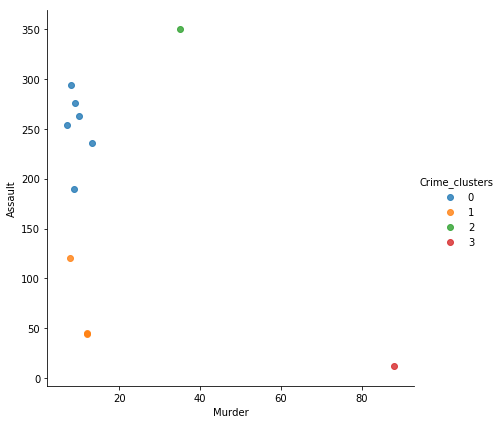

In [19]:
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, height = 6 );

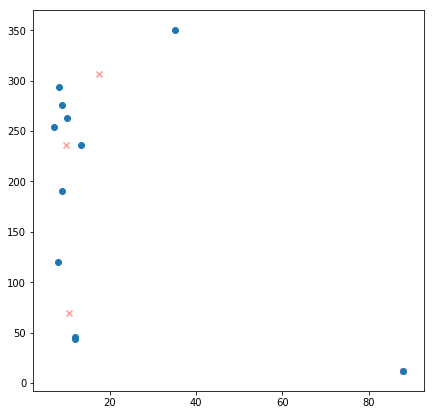

In [20]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
c=plt.scatter(data.iloc[:,0],data.iloc[:,1])

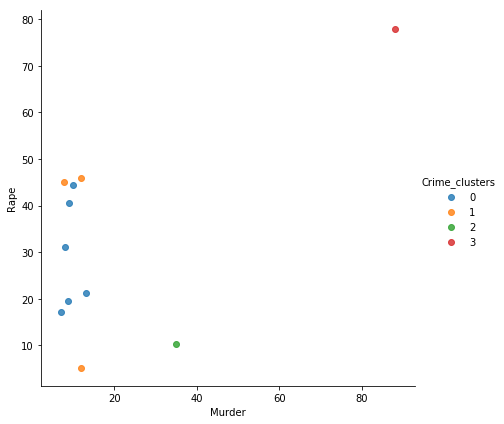

In [22]:
sns.lmplot( 'Murder','Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, height = 6 );

In [23]:
variables_correlation = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
variables_correlation.corr()

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,-0.379260,0.583608,-0.573475
Assault,-0.379260,1.000000,-0.435716,0.625214
Rape,0.583608,-0.435716,1.000000,-0.426508
UrbanPop,-0.573475,0.625214,-0.426508,1.000000


In [24]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head()

,Unnamed: 0,State,UrbanPop,Murder,Assault,Rape,Total,Crime_clusters
8,8,Georgia,17.0,88.0,12.0,78.0,124.5,3
7,7,New York,45.0,12.0,44.0,5.2,145.8,1
3,3,Arkansas,50.0,8.8,190.0,19.5,218.3,0
0,0,Alabama,58.0,13.2,236.0,21.2,270.4,0
1,1,Alaska,48.0,10.0,263.0,44.5,317.5,0


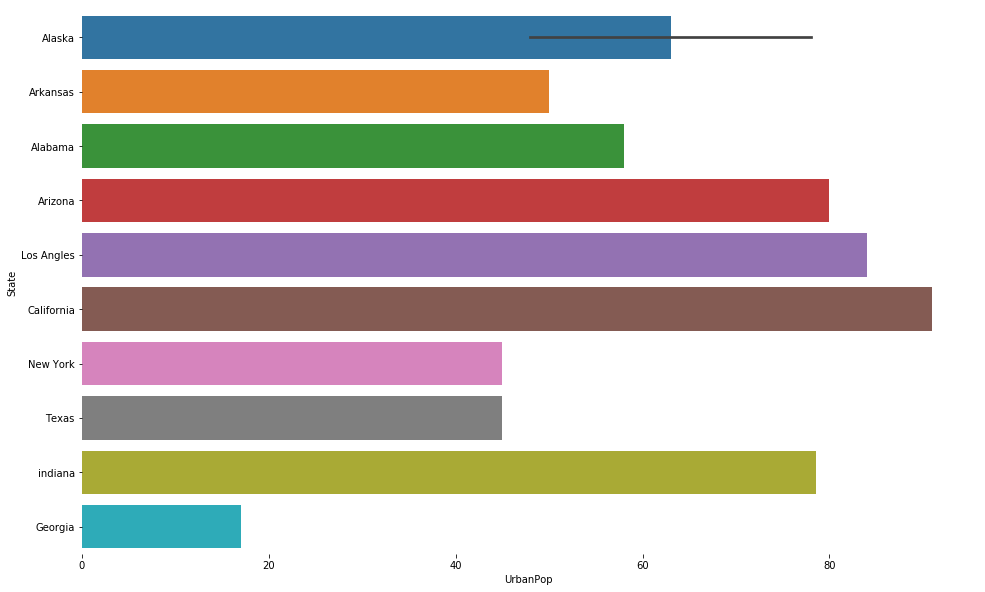

In [25]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="State", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)